In [1]:
# #!/bin/bash
# !curl -L -o ~/datasets/amazon-books-reviews.zip\
#   https://www.kaggle.com/api/v1/datasets/download/mohamedbakhet/amazon-books-reviews

# !pip install pandas 
# !which python

In [2]:
import pandas as pd

dir = "/home/quang/Two-stages-recommendation-system/datasets/"

# Load the data
df = pd.read_csv(dir + 'Books_rating.csv')

# Basic info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB
None


In [3]:
print("Dataset shape:", df.shape)
print("\nFirst 3 rows:")
display(df.head(3))

Dataset shape: (3000000, 10)

First 3 rows:


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."


In [4]:
# Statistical summary
print(df.describe(include='all'))

                Id       Title          Price         User_id  \
count      3000000     2999792  481171.000000         2438213   
unique      221998      212403            NaN         1008972   
top     B000IEZE3G  The Hobbit            NaN  A14OJS0VWMOSWO   
freq          6796       22023            NaN            5795   
mean           NaN         NaN      21.762656             NaN   
std            NaN         NaN      26.206541             NaN   
min            NaN         NaN       1.000000             NaN   
25%            NaN         NaN      10.780000             NaN   
50%            NaN         NaN      14.930000             NaN   
75%            NaN         NaN      23.950000             NaN   
max            NaN         NaN     995.000000             NaN   

                profileName review/helpfulness  review/score   review/time  \
count               2438095            3000000  3.000000e+06  3.000000e+06   
unique               854145              12084           NaN   

In [5]:
# Check for missing values
print(df.isnull().sum())

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64


In [6]:
# Unique values in categorical columns
for col in ['review/score', 'review/summary']:
    print(f"\n{col} unique values:", df[col].nunique())


review/score unique values: 5

review/summary unique values: 1592314


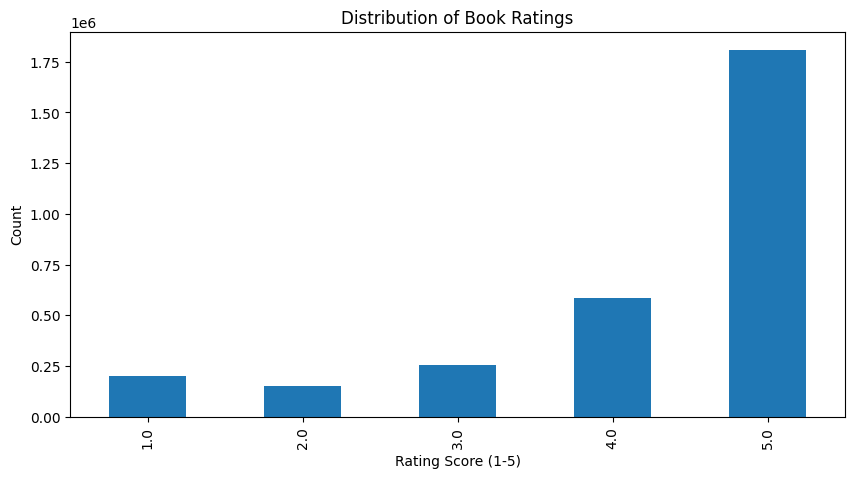

In [7]:
import matplotlib.pyplot as plt

# Rating distribution
rating_counts = df['review/score'].value_counts().sort_index()
rating_counts.plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating Score (1-5)')
plt.ylabel('Count')
plt.show()


Review length statistics:
count    2.999992e+06
mean     8.226339e+02
std      9.660765e+02
min      1.000000e+00
25%      2.620000e+02
50%      5.160000e+02
75%      1.009000e+03
max      3.257600e+04
Name: review_length, dtype: float64


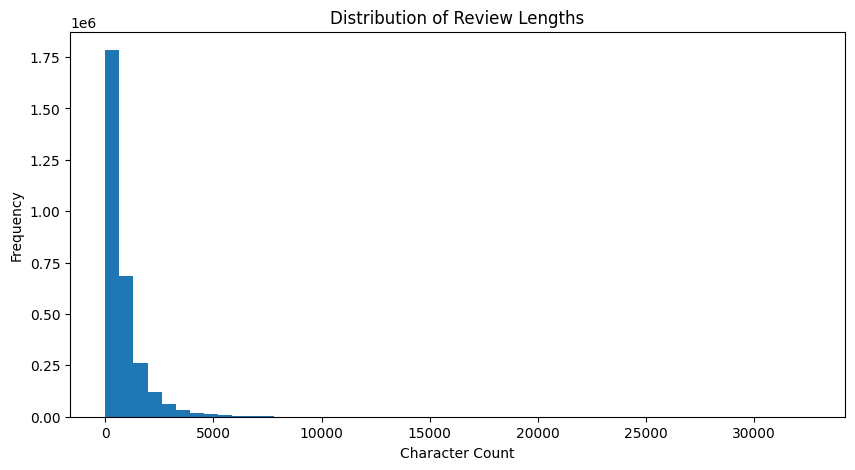

In [8]:
# Review length analysis
df['review_length'] = df['review/text'].str.len()

print("\nReview length statistics:")
print(df['review_length'].describe())

# Plot review length distribution
plt.figure(figsize=(10,5))
df['review_length'].plot(kind='hist', bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Character Count')
plt.show()

In [9]:
# Top 10 most reviewed books
top_books = df['Title'].value_counts().head(10)
print("\nTop 10 most reviewed books:")
print(top_books)

# Top 10 highest rated books (with minimum 100 reviews)
min_reviews = 100
book_stats = df.groupby('Title').agg({
    'review/score': ['mean', 'count']
}).sort_values(('review/score', 'mean'), ascending=False)
top_rated = book_stats[book_stats[('review/score', 'count')] >= min_reviews].head(10)
print("\nTop 10 highest rated books (min 100 reviews):")
print(top_rated)


Top 10 most reviewed books:
Title
The Hobbit                               22023
Pride and Prejudice                      20371
Atlas Shrugged                           12513
Wuthering Heights                        10780
The Giver                                 7644
Great Expectations                        7421
Harry Potter and The Sorcerer's Stone     6796
Of Mice and Men                           6728
Brave New World                           6312
Mere Christianity                         6053
Name: count, dtype: int64

Top 10 highest rated books (min 100 reviews):
                                                   review/score      
                                                           mean count
Title                                                                
Lilla Belle: The First Stages                          5.000000   113
Why revival tarries                                    4.970732   205
shadow castle                                          4.948276   116
Sh

In [10]:
!pip install transformers

In [11]:
from transformers import pipeline


/home/quang/Two-stages-recommendation-system/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-12 13:45:04.153935: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-12 13:45:04.406752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749725104.497778   42534 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749725104.522963   4253

In [15]:
classifier = pipeline("text-classification", model = "bhadresh-savani/distilbert-base-uncased-emotion")



Device set to use cuda:0


In [20]:
prediction = classifier("today i'm sad")
for key, value in prediction[0].items():
    print(f"{key}: {value}")


label: sadness
score: 0.9983229041099548


In [21]:
def detect_emotion(review, classifier): 
    result = classifier(review) 
    return result[0]['label'] 

In [ ]:
df['emotion'] = df['reviewText'].apply(detect_emotion)